In [89]:
import csv
import os
import netCDF4 as nc
import numpy as np 
import pandas as pd
import numpy
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [90]:
df= pd.read_csv("PV_Array_8.csv") 

In [95]:
df

,Unnamed: 0,Active_Power,version,technology,year_of_installation,rating,npanels,azimuth,tilt,orient,...,Hour,Minute,Year,Weather_Temperature_Celsius_y,Weather_Relative_Humidity_y,Global_Horizontal_Radiation_y,Weather_Daily_Rainfall_y,roof,manuf,version_encoded
0,0,0.000000,9,5,2013,150.37594,24,0,20,1,...,0,0,2019,30.020723,20.125513,1.543787,0.0,0,3,8
1,1,0.000000,9,5,2013,150.37594,24,0,20,1,...,0,5,2019,29.958652,20.040049,1.373370,0.0,0,3,8
2,2,0.000000,9,5,2013,150.37594,24,0,20,1,...,0,10,2019,29.884491,20.013313,1.142953,0.0,0,3,8
3,3,0.000000,9,5,2013,150.37594,24,0,20,1,...,0,15,2019,29.831554,20.068233,0.709036,0.0,0,3,8
4,4,0.000000,9,5,2013,150.37594,24,0,20,1,...,0,20,2019,29.750330,20.086567,1.058623,0.0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504545,504545,88.354215,9,5,2013,150.37594,24,0,20,1,...,9,45,2024,34.013470,25.583040,757.537598,0.0,0,3,8
504546,504546,90.746868,9,5,2013,150.37594,24,0,20,1,...,9,50,2024,33.855091,26.231167,781.269714,0.0,0,3,8
504547,504547,92.442771,9,5,2013,150.37594,24,0,20,1,...,9,55,2024,34.198555,26.283249,801.314026,0.0,0,3,8
504548,504548,106.285712,9,5,2013,150.37594,24,0,20,1,...,10,35,2024,35.107956,23.347351,930.364441,0.0,0,3,8


# Nettoyage des données (Data Cleaning) 


## Traitez les données manquantes (NaN) avec des méthodes adaptées.

In [3]:
df.isna().sum()

Unnamed: 0                       0
Active_Power                     0
version                          0
technology                       0
year_of_installation             0
rating                           0
npanels                          0
azimuth                          0
tilt                             0
orient                           0
support                          0
track                            0
maintenance_startm               0
maintenance_starth               0
maintenance_endm                 0
maintenance_endh                 0
Day                              0
Month                            0
Hour                             0
Minute                           0
Year                             0
Weather_Temperature_Celsius_y    0
Weather_Relative_Humidity_y      0
Global_Horizontal_Radiation_y    0
Weather_Daily_Rainfall_y         0
roof                             0
manuf                            0
version_encoded                  0
dtype: int64

## Traitez les données erronées

In [4]:
df.applymap(np.isreal).all().all()

True

In [91]:
df.describe()

,Unnamed: 0,Active_Power,version,technology,year_of_installation,rating,npanels,azimuth,tilt,orient,...,Hour,Minute,Year,Weather_Temperature_Celsius_y,Weather_Relative_Humidity_y,Global_Horizontal_Radiation_y,Weather_Daily_Rainfall_y,roof,manuf,version_encoded
count,504550.000000,504550.000000,504550.0,504550.0,504550.0,5.045500e+05,504550.0,504550.0,504550.0,504550.0,...,504550.000000,504550.000000,504550.000000,504550.000000,504550.000000,504550.000000,504550.000000,504550.0,504550.0,504550.0
mean,252274.500000,33.739811,9.0,5.0,2013.0,1.503759e+02,24.0,0.0,20.0,1.0,...,11.492203,27.505054,2021.015687,21.457458,36.186110,272.553099,0.337459,0.0,3.0,8.0
std,145651.183497,45.450129,0.0,0.0,0.0,1.942654e-09,0.0,0.0,0.0,0.0,...,6.925357,17.259773,1.451028,9.589780,23.013597,371.361152,2.156567,0.0,0.0,0.0
min,0.000000,0.000000,9.0,5.0,2013.0,1.503759e+02,24.0,0.0,20.0,1.0,...,0.000000,0.000000,2019.000000,-5.583038,0.000000,0.000000,0.000000,0.0,3.0,8.0
25%,126137.250000,0.000000,9.0,5.0,2013.0,1.503759e+02,24.0,0.0,20.0,1.0,...,5.000000,15.000000,2020.000000,14.686932,18.100699,2.047594,0.000000,0.0,3.0,8.0
50%,252274.500000,0.000000,9.0,5.0,2013.0,1.503759e+02,24.0,0.0,20.0,1.0,...,11.000000,30.000000,2021.000000,21.893557,29.911710,7.491089,0.000000,0.0,3.0,8.0
75%,378411.750000,72.414367,9.0,5.0,2013.0,1.503759e+02,24.0,0.0,20.0,1.0,...,17.000000,45.000000,2022.000000,28.522311,49.803900,551.934784,0.000000,0.0,3.0,8.0
max,504549.000000,152.254021,9.0,5.0,2013.0,1.503759e+02,24.0,0.0,20.0,1.0,...,23.000000,55.000000,2024.000000,45.690884,104.217438,1524.541870,52.000072,0.0,3.0,8.0


# DBSCAN

In [67]:
df_dbscan=df[['Global_Horizontal_Radiation_y','Active_Power']]

In [68]:
df_dbscan

,Global_Horizontal_Radiation_y,Active_Power
0,1.543787,0.000000
1,1.373370,0.000000
2,1.142953,0.000000
3,0.709036,0.000000
4,1.058623,0.000000
...,...,...
504545,757.537598,88.354215
504546,781.269714,90.746868
504547,801.314026,92.442771
504548,930.364441,106.285712


<Axes: xlabel='Global_Horizontal_Radiation_y', ylabel='Active_Power'>

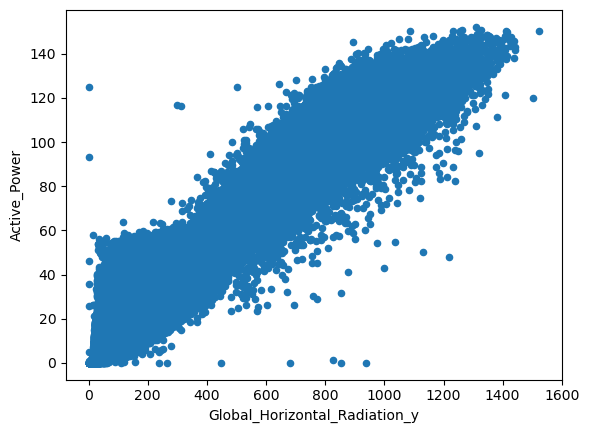

In [69]:
df_dbscan.plot.scatter(x='Global_Horizontal_Radiation_y', y='Active_Power')

##  Etape1:choix du  eps

### 1. Normaliser les données :

In [70]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_dbscan)

In [71]:
data_scaled

array([[-0.72977364, -0.7423487 ],
       [-0.73023254, -0.7423487 ],
       [-0.73085301, -0.7423487 ],
       ...,
       [ 1.42384697,  1.29159188],
       [ 1.77135381,  1.59616648],
       [ 1.78408742,  1.61237852]])

### 2. Calculer les distances des k-voisins les plus proches :

In [72]:
from sklearn.neighbors import NearestNeighbors
# Choisir k (par exemple, min_samples = 10)
k = 10
# Calculer les distances des k-voisins les plus proches
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

In [73]:
np.shape(distances)

(504550, 10)

In [74]:
distances[2]

array([0.00000000e+00, 1.00796095e-07, 1.27439649e-07, 1.48305083e-07,
       1.88109910e-07, 2.85374932e-07, 2.94363119e-07, 3.25179759e-07,
       3.76219820e-07, 3.96764247e-07])

In [75]:
indices[2]

array([     2, 197259, 333757, 104249, 491142,  89136, 289943, 283659,
       314530, 104769], dtype=int64)

### 3. Trier les distances :

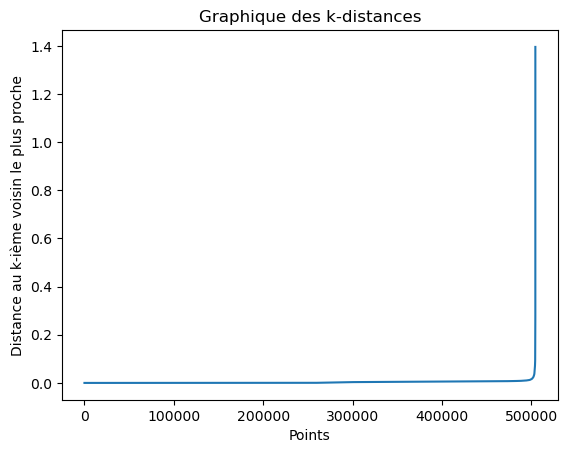

In [76]:
# Tracer le graphique des k-distances
k_distances =np.sort(distances[:, -1])  # Dernière colonne des distances (k-ème voisin)
plt.plot(k_distances)
plt.xlabel('Points')
plt.ylabel('Distance au k-ième voisin le plus proche')
plt.title('Graphique des k-distances')
plt.show()

In [77]:
# Ajuster une ligne droite entre le premier et le dernier point
from scipy.spatial.distance import euclidean
k_distances_sorted = np.sort(distances[:, -1])
line_start = [0, k_distances_sorted[0]]
line_end = [len(k_distances_sorted)-1,k_distances_sorted[-1]]
# Calculer la distance de chaque point à la ligne
distances_to_line = []
for i, y in enumerate(k_distances_sorted):
    # Point sur la ligne
    line_point = [(line_end[0]-line_start[0]) * i / (len(k_distances_sorted)-1) + line_start[0],
                  (line_end[1]-line_start[1]) * i / (len(k_distances_sorted)-1) + line_start[1]]
    distances_to_line.append(euclidean([i, y], line_point))
# Trouver le point le plus éloigné de la ligne
index_coudee = np.argmax(distances_to_line)
epsilon = k_distances_sorted[index_coudee]
print("Valeur estimée de epsilon :", epsilon)

Valeur estimée de epsilon : 0.016124537583431544


### Application du dbscan

In [86]:
np.shape(data_scaled)[0]/10

50455.0

In [87]:
data_scaled_1=data_scaled[:int(np.shape(data_scaled)[0]/10),:]

In [88]:
dbscan= DBSCAN( 0.016, min_samples=10).fit_predict(data_scaled_1)

In [53]:
dbscan.max()

40

In [54]:
np.count_nonzero(dbscan==-1)

1853

C:\Users\ARIRI\AppData\Local\Temp\ipykernel_8684\3952919333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_1['Cluster'] = dbscan  # dbscan contient les étiquettes du clustering


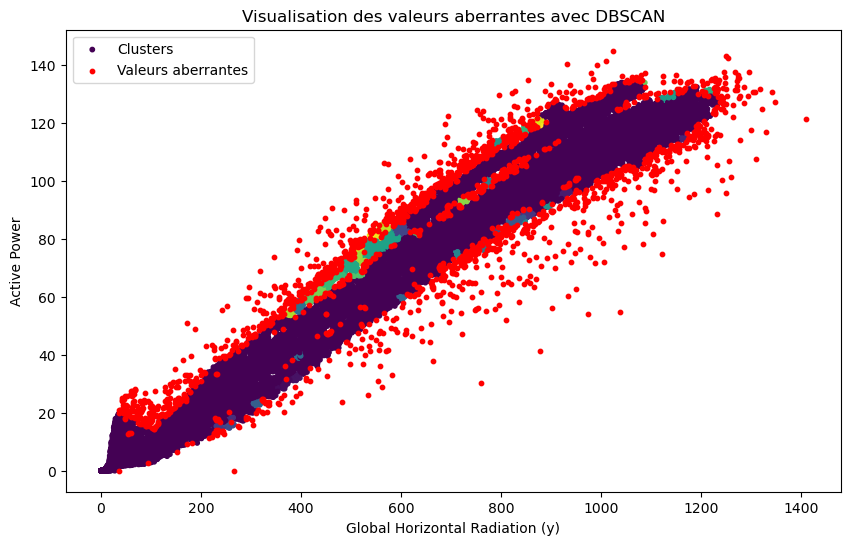

In [56]:
import matplotlib.pyplot as plt
df_2019_1=df_2019.iloc[:int(np.shape(data_scaled)[0]/3)]

# Ajouter les résultats de DBSCAN au DataFrame original
df_2019_1['Cluster'] = dbscan  # dbscan contient les étiquettes du clustering

# Séparer les valeurs aberrantes et les points des clusters
outliers = df_2019_1[df_2019_1['Cluster'] == -1]
clusters = df_2019_1[df_2019_1['Cluster'] != -1]

# Créer le scatter plot
plt.figure(figsize=(10, 6))

# Points des clusters (non-aberrants)
plt.scatter(clusters['Global_Horizontal_Radiation_y'], clusters['Active_Power'],
            c=clusters['Cluster'], cmap='viridis', s=10, label="Clusters")

# Points aberrants
plt.scatter(outliers['Global_Horizontal_Radiation_y'], outliers['Active_Power'],
            c='red', s=10, label="Valeurs aberrantes")

# Ajouter des labels et un titre
plt.title("Visualisation des valeurs aberrantes avec DBSCAN")
plt.xlabel("Global Horizontal Radiation (y)")
plt.ylabel("Active Power")
plt.legend()
plt.show()


<Axes: xlabel='Global_Horizontal_Radiation_y', ylabel='Active_Power'>

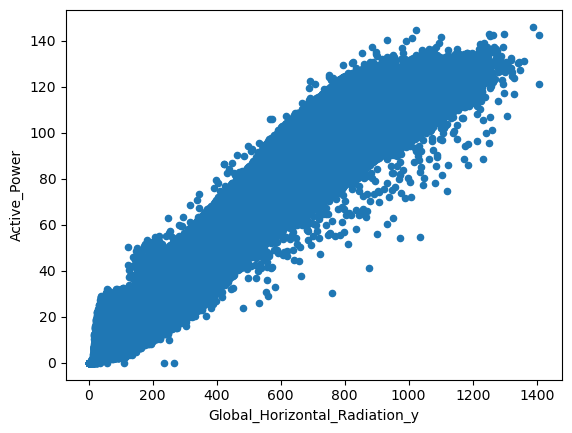

In [86]:
df_2019.plot.scatter(x='Global_Horizontal_Radiation_y', y='Active_Power')